In [1]:
import datajoint as dj

In [2]:
import sys
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\pipeline') # go to parent dir
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\scripts')
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\development')
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-lab')

Entity Relation Diagrams (ERDs)

In [5]:
import mock

Connecting daveliu@mesoscale-activity.datajoint.io:3306


In [6]:
mock.dropdbs()

dropping databases
error dropping ccf in attempt 0: (1451, 'Cannot delete or update a parent row: a foreign key constraint fails')


In [3]:
import mapshell

Connecting daveliu@mesoscale-activity.datajoint.io:3306


c:\users\liul.hhmi\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
import ingestBehavior

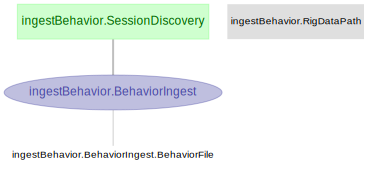

In [6]:
dj.ERD(ingestBehavior)

In [6]:
rigDataPath=ingestBehavior.RigDataPath()
rigDataPath

rig,rig_data_path rig data path,rig_search_order rig search order
RRig,\\wangt-ww1\Documents\MATLAB\Bpod Local\Data,3
TRig1,\\MOHARB-NUC1\Documents\Arduino\Bpod_Train1\Bpod Local\Data,0
TRig2,\\MOHARB-WW2\C\Users\labadmin\Documents\MATLAB\Bpod Local\Data,1
TRig3,\\WANGT-NUC\Documents\MATLAB\Bpod Local\Data,2


In [4]:
import lab

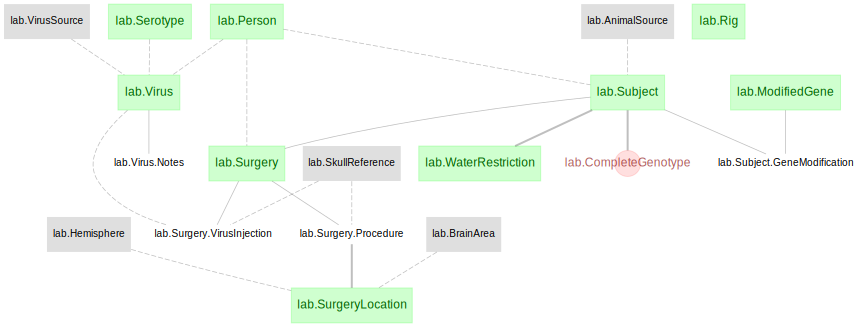

In [5]:
dj.ERD(lab)

In [4]:
import experiment

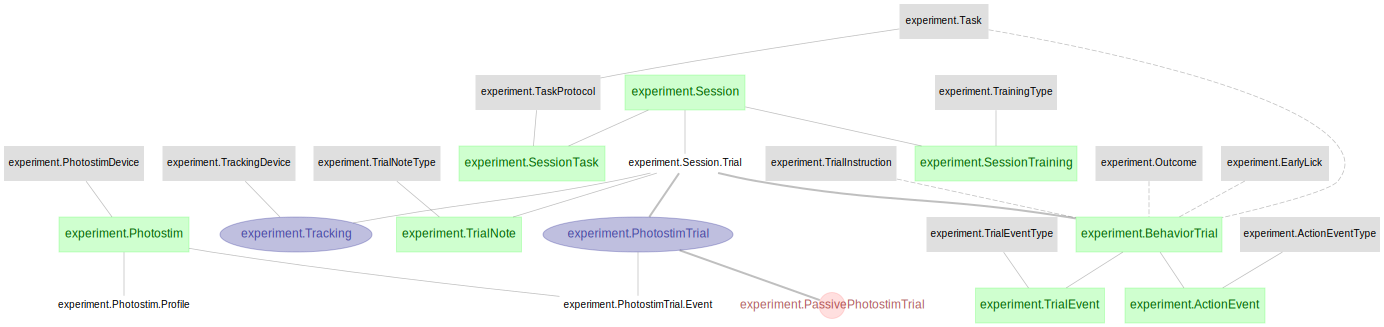

In [5]:
dj.ERD(experiment)

In [5]:
import ephys

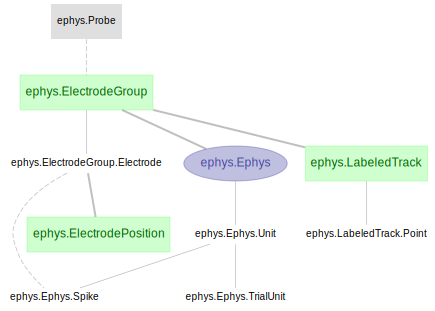

In [6]:
dj.ERD(ephys)

In [6]:
mouse=lab.Subject()
mouse

subject_id institution 6 digit animal ID,username,cage_number institution 6 digit animal ID,date_of_birth format: yyyy-mm-dd,sex,animal_source
123457,daveliu,145375,2017-08-03,M,Jackson labs
353936,ars,123456,2000-01-01,Unknown,Other
353938,ars,123456,2000-01-01,Unknown,Other
353939,ars,123456,2000-01-01,Unknown,Other
359855,ars,123456,2000-01-01,Unknown,Other
359856,ars,123456,2000-01-01,Unknown,Other
365938,ars,123456,2000-01-01,Unknown,Other


In [8]:
h2o=ephys.experiment.lab.WaterRestriction()
h2o

subject_id institution 6 digit animal ID,water_restriction_number WR number,cage_number,wr_start_date,wr_start_weight


In [ ]:
person=ephys.experiment.lab.Person()
person

In [ ]:
rig=ephys.experiment.lab.Rig()
rig

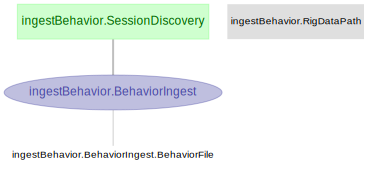

In [9]:
import ingestBehavior
dj.ERD(ingestBehavior)

In [ ]:
mapshell.logsetup()

In [3]:
mapshell.discover()

b6_TW_autoTrain_20171107_100620.mat skipped - no animal for b6
b6_TW_autoTrain_20171108_095511.mat skipped - no animal for b6
b6_TW_autoTrain_20171109_093437.mat skipped - no animal for b6
b6_TW_autoTrain_20171110_064105.mat skipped - no animal for b6
b6_TW_autoTrain_20171113_095102.mat skipped - no animal for b6
b6_TW_autoTrain_20171114_093558.mat skipped - no animal for b6
b6_TW_autoTrain_20171115_093104.mat skipped - no animal for b6
b6_TW_autoTrain_20171115_093445.mat skipped - no animal for b6
b6_TW_autoTrain_20171116_100944.mat skipped - no animal for b6
b6_TW_autoTrain_20171117_095905.mat skipped - no animal for b6
b67_TW_autoTrain_20171107_091040.mat skipped - no animal for b67
b67_TW_autoTrain_20171109_102128.mat skipped - no animal for b67
b67_TW_autoTrain_20171113_105817.mat skipped - no animal for b67
b67_TW_autoTrain_20171114_104840.mat skipped - no animal for b67
b67_TW_autoTrain_20171114_113832.mat skipped - no animal for b67
b67_TW_autoTrain_20171115_103728.mat skipped 

In [ ]:
import os
for root, dirs, files in os.walk(r'H:\\data\MAP'):
    print('Found directory: %s' % root)


In [ ]:
root

In [8]:
sessDis=ingestBehavior.SessionDiscovery()
sessDis

subject_id institution 6 digit animal ID,session_date discovered date
123457,2017-10-17
123457,2017-10-18
123457,2017-10-19
123457,2017-10-20
123457,2017-10-21
123457,2017-10-23
123457,2017-10-24


In [4]:
mapshell.populate()

split session case detected for dl21 on 2018-03-01


IndexError: index 0 is out of bounds for axis 0 with size 0

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as spio
import numpy as np

In [ ]:
trialNote = ephys.experiment.TrialNote()

In [ ]:
ephys.experiment.Session() & 'animal = 123456' & 'session = 1'

In [ ]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [ ]:
outcome = (behaviorTrial & 'animal = 123456').fetch('outcome', order_by='session')
early_lick = (behaviorTrial  & 'animal = 123456').fetch('early_lick', order_by='session')

In [ ]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [ ]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [ ]:
trial_note = (trialNote & 'animal = 397853').fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [ ]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [ ]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')

In [ ]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')